In [1]:
import pandas as pd

ipl = pd.read_csv('ipl.csv')

In [2]:
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1.0,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1.0,0.0,0.1,1.0,0.0,0.0,0.0,222.0
1,1.0,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1.0,0.0,0.2,1.0,0.0,0.0,0.0,222.0
2,1.0,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.2,2.0,0.0,0.0,0.0,222.0
3,1.0,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.3,2.0,0.0,0.0,0.0,222.0
4,1.0,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.4,2.0,0.0,0.0,0.0,222.0


In [3]:
ipl.drop(['mid','batsman','bowler','striker','non-striker'], axis =1, inplace = True)

In [4]:
ipl.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1.0,0.0,0.1,1.0,0.0,222.0
1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1.0,0.0,0.2,1.0,0.0,222.0
2,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2.0,0.0,0.2,2.0,0.0,222.0
3,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2.0,0.0,0.3,2.0,0.0,222.0
4,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2.0,0.0,0.4,2.0,0.0,222.0


In [5]:
# We can make valid prediction only when 5 overs have passed, so removing data below 5 overs

ipl = ipl[ipl['overs']>=5.0]

#### Handling Runs, Wickets, runs_last_5, wickets_last_5, total Column

In [6]:
# Converting all these columns into int type

ipl['runs'] = ipl[['runs']].astype(int)
ipl['wickets'] = ipl[['wickets']].astype(int)
ipl['runs_last_5'] = ipl[['runs_last_5']].astype(int)
ipl['wickets_last_5'] = ipl[['wickets_last_5']].astype(int)
ipl['total'] = ipl[['total']].astype(int)

#### Handling Date Column

In [7]:
# Converting date column to datetime object

from datetime import datetime
ipl['date'] = ipl['date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))

#### Handling Bat_team & Bowl_team Column

In [8]:
ipl.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [9]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils', 'Sunrisers Hyderabad','Gujarat Lions','Pune Warriors']

In [10]:
ipl = ipl[(ipl['bat_team'].isin(consistent_teams)) & (ipl['bowl_team'].isin(consistent_teams))]

In [11]:
ipl['bat_team'] = ipl['bat_team'].replace({'Kings XI Punjab': 'Punjab Kings', 'Gujarat Lions': 'Gujarat Titans','Delhi Daredevils':'Delhi Capitals'})

In [12]:
ipl.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Punjab Kings', 'Royal Challengers Bangalore',
       'Delhi Capitals', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Titans'], dtype=object)

In [13]:
ipl['bowl_team'] = ipl['bowl_team'].replace({'Kings XI Punjab': 'Punjab Kings', 'Gujarat Lions': 'Gujarat Titans','Delhi Daredevils':'Delhi Capitals'})

In [14]:
ipl.bowl_team.unique()

array(['Royal Challengers Bangalore', 'Punjab Kings', 'Delhi Capitals',
       'Rajasthan Royals', 'Mumbai Indians', 'Chennai Super Kings',
       'Kolkata Knight Riders', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Titans'], dtype=object)

In [15]:
# One Hot Encoding for bat_team and bowl_team columns

bat_bowl = ipl[['bat_team','bowl_team']]
bat_bowl = pd.get_dummies(bat_bowl)
bat_bowl.head()

,bat_team_Chennai Super Kings,bat_team_Delhi Capitals,bat_team_Gujarat Titans,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Pune Warriors,bat_team_Punjab Kings,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Capitals,bowl_team_Gujarat Titans,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Pune Warriors,bowl_team_Punjab Kings,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
33,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
34,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
36,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [16]:
bat_bowl.drop(['bat_team_Pune Warriors','bowl_team_Pune Warriors'], axis = 1, inplace = True)
bat_bowl.head()

,bat_team_Chennai Super Kings,bat_team_Delhi Capitals,bat_team_Gujarat Titans,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Punjab Kings,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Capitals,bowl_team_Gujarat Titans,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Punjab Kings,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
33,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
34,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
36,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


#### Handling Venue Column

In [17]:
ipl['venue'].value_counts().sort_values(ascending=False)

M Chinnaswamy Stadium                                   4962
Eden Gardens                                            4776
Wankhede Stadium                                        4711
Feroz Shah Kotla                                        4641
MA Chidambaram Stadium, Chepauk                         4008
Punjab Cricket Association Stadium, Mohali              2980
Sawai Mansingh Stadium                                  2794
Rajiv Gandhi International Stadium, Uppal               2497
Subrata Roy Sahara Stadium                              1470
Sardar Patel Stadium, Motera                            1016
Kingsmead                                               1012
Brabourne Stadium                                        933
Dr DY Patil Sports Academy                               916
Punjab Cricket Association IS Bindra Stadium, Mohali     912
Saurashtra Cricket Association Stadium                   738
SuperSport Park                                          657
Dubai International Cric

In [18]:
# Venue column has multiple categorical variable so 
# we are going to use OneHoting for multiple column method

top_20 = [x for x in ipl['venue'].value_counts().sort_values(ascending=False).head(20).index]
top_20

['M Chinnaswamy Stadium',
 'Eden Gardens',
 'Wankhede Stadium',
 'Feroz Shah Kotla',
 'MA Chidambaram Stadium, Chepauk',
 'Punjab Cricket Association Stadium, Mohali',
 'Sawai Mansingh Stadium',
 'Rajiv Gandhi International Stadium, Uppal',
 'Subrata Roy Sahara Stadium',
 'Sardar Patel Stadium, Motera',
 'Kingsmead',
 'Brabourne Stadium',
 'Dr DY Patil Sports Academy',
 'Punjab Cricket Association IS Bindra Stadium, Mohali',
 'Saurashtra Cricket Association Stadium',
 'SuperSport Park',
 'Dubai International Cricket Stadium',
 'Himachal Pradesh Cricket Association Stadium',
 'JSCA International Stadium Complex',
 'Sheikh Zayed Stadium']

In [19]:
# Making 20 binary variables

import numpy as np
for label in top_20:
    ipl[label] = np.where(ipl['venue']==label,1,0)

In [20]:
ipl[['venue']+top_20].head(5)

,venue,M Chinnaswamy Stadium,Eden Gardens,Wankhede Stadium,Feroz Shah Kotla,"MA Chidambaram Stadium, Chepauk","Punjab Cricket Association Stadium, Mohali",Sawai Mansingh Stadium,"Rajiv Gandhi International Stadium, Uppal",Subrata Roy Sahara Stadium,...,Kingsmead,Brabourne Stadium,Dr DY Patil Sports Academy,"Punjab Cricket Association IS Bindra Stadium, Mohali",Saurashtra Cricket Association Stadium,SuperSport Park,Dubai International Cricket Stadium,Himachal Pradesh Cricket Association Stadium,JSCA International Stadium Complex,Sheikh Zayed Stadium
32,M Chinnaswamy Stadium,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,M Chinnaswamy Stadium,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,M Chinnaswamy Stadium,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,M Chinnaswamy Stadium,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,M Chinnaswamy Stadium,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
ipl.head(2)

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,...,Kingsmead,Brabourne Stadium,Dr DY Patil Sports Academy,"Punjab Cricket Association IS Bindra Stadium, Mohali",Saurashtra Cricket Association Stadium,SuperSport Park,Dubai International Cricket Stadium,Himachal Pradesh Cricket Association Stadium,JSCA International Stadium Complex,Sheikh Zayed Stadium
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222,...,0,0,0,0,0,0,0,0,0,0
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222,...,0,0,0,0,0,0,0,0,0,0


In [22]:
ipl.columns

Index(['date', 'venue', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total', 'M Chinnaswamy Stadium',
       'Eden Gardens', 'Wankhede Stadium', 'Feroz Shah Kotla',
       'MA Chidambaram Stadium, Chepauk',
       'Punjab Cricket Association Stadium, Mohali', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'Subrata Roy Sahara Stadium', 'Sardar Patel Stadium, Motera',
       'Kingsmead', 'Brabourne Stadium', 'Dr DY Patil Sports Academy',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Saurashtra Cricket Association Stadium', 'SuperSport Park',
       'Dubai International Cricket Stadium',
       'Himachal Pradesh Cricket Association Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium'],
      dtype='object')

In [23]:
ipl.drop(['venue','bat_team', 'bowl_team','date'], axis = 1, inplace = True)
ipl.columns

Index(['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total',
       'M Chinnaswamy Stadium', 'Eden Gardens', 'Wankhede Stadium',
       'Feroz Shah Kotla', 'MA Chidambaram Stadium, Chepauk',
       'Punjab Cricket Association Stadium, Mohali', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'Subrata Roy Sahara Stadium', 'Sardar Patel Stadium, Motera',
       'Kingsmead', 'Brabourne Stadium', 'Dr DY Patil Sports Academy',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Saurashtra Cricket Association Stadium', 'SuperSport Park',
       'Dubai International Cricket Stadium',
       'Himachal Pradesh Cricket Association Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium'],
      dtype='object')

#### Creating Final dataframe

In [24]:
train_ipl = pd.concat([ipl, bat_bowl], axis = 1)
train_ipl.columns

Index(['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total',
       'M Chinnaswamy Stadium', 'Eden Gardens', 'Wankhede Stadium',
       'Feroz Shah Kotla', 'MA Chidambaram Stadium, Chepauk',
       'Punjab Cricket Association Stadium, Mohali', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'Subrata Roy Sahara Stadium', 'Sardar Patel Stadium, Motera',
       'Kingsmead', 'Brabourne Stadium', 'Dr DY Patil Sports Academy',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Saurashtra Cricket Association Stadium', 'SuperSport Park',
       'Dubai International Cricket Stadium',
       'Himachal Pradesh Cricket Association Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'bat_team_Chennai Super Kings', 'bat_team_Delhi Capitals',
       'bat_team_Gujarat Titans', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Punjab Kings',
       'bat_team_Rajasthan R

In [25]:
train_ipl.tail(1)

,runs,wickets,overs,runs_last_5,wickets_last_5,total,M Chinnaswamy Stadium,Eden Gardens,Wankhede Stadium,Feroz Shah Kotla,...,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Capitals,bowl_team_Gujarat Titans,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Punjab Kings,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
75888,107,10,18.5,23,5,107,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Feature Selection

In [26]:
X = train_ipl.drop('total', axis = 1)
y = train_ipl['total']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [29]:
from sklearn.tree import DecisionTreeRegressor

dfr = DecisionTreeRegressor()
dfr.fit(X_train, y_train)

DecisionTreeRegressor()

In [30]:
y_pred = dfr.predict(X_test)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total', ylabel='Density'>

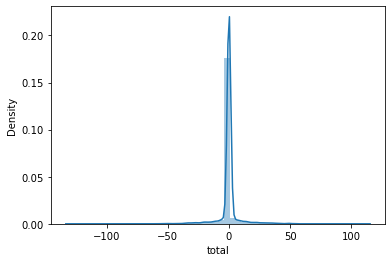

In [31]:
import seaborn as sns
sns.distplot(y_test-y_pred)

In [32]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2_Score:', metrics.r2_score(y_test, y_pred))

MAE: 2.7409090909090907
MSE: 83.37424242424242
RMSE: 9.130949700017103
R2_Score: 0.905024443408327


In [34]:
# Creating a pickle file for the classifier

import pickle

filename = 'ipl_score_model.pkl'
pickle.dump(dfr, open(filename, 'wb'))